## Machine Learning
### 5. Linear Regression


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [2]:
# read .csv into a DataFrame
house_data = pd.read_csv("Data/house_prices.csv")
print(house_data)

size = house_data['sqft_living']
price = house_data['price']
print(size)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [4]:
# machine learning handle arrays not data-frames
x = np.array(size).reshape(-1, 1)  # each row is an array
y = np.array(price).reshape(-1, 1)
print(x)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


MSE:  650965.7788663033
R squared value: 0.4928532179037931
slope(b1):  [280.6235679]
intercept(b0):  -43580.743094479316


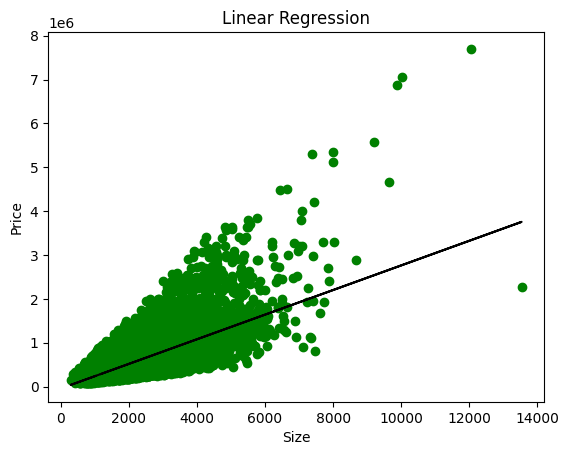

Prediction by the model:  [[517666.39270042]]


In [5]:
# we use Linear Regression + fit() is the training
model = LinearRegression()
model.fit(x, y)  # Train

# MSE (cost function) and R value
regression_model_mse = mean_squared_error(x, y)
print("MSE: ", math.sqrt(regression_model_mse))

# R^2 = 1 - (RSS/TSS) -> accuracy of the regression models
print("R squared value:", model.score(x, y))

# we can get the b values after the model fit
print("slope(b1): ", model.coef_[0])
print("intercept(b0): ", model.intercept_[0])

# visualize the data-set with the fitted model
plt.scatter(x, y, color='green')
plt.plot(x, model.predict(x), color='black')
plt.title("Linear Regression")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

# Predicting the prices
print("Prediction by the model: ", model.predict([[2000]]))

### 6. Logistic Regression
#### 6.1. Simple Example

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

[0.  0.6 1.1 1.5 1.8 2.5 3.  3.1 3.9 4.  4.9 5.  5.1 3.  3.8 4.4 5.2 5.5
 6.5 6.  6.1 6.9 7.  7.9 8.  8.1] [0.  0.6 1.1 1.5 1.8 2.5 3.  3.1 3.9 4.  4.9 5.  5.1] [3.  3.8 4.4 5.2 5.5 6.5 6.  6.1 6.9 7.  7.9 8.  8.1]


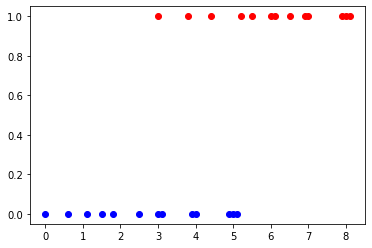

In [25]:
x1 = np.array([0, 0.6, 1.1, 1.5, 1.8, 2.5, 3, 3.1, 3.9, 4, 4.9, 5, 5.1])
y1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

x2 = np.array([3, 3.8, 4.4, 5.2, 5.5, 6.5, 6, 6.1, 6.9, 7, 7.9, 8, 8.1])
y2 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

plt.plot(x1, y1, 'o', color='blue')
plt.plot(x2, y2, 'o', color='red')
X = np.concatenate((x1, x2), axis=0)
print(X, x1, x2)

In [35]:
X = np.concatenate((x1, x2), axis=0).reshape(-1, 1)  # reshape to make 2D array
y = np.concatenate((y1, y2), axis=0).reshape(-1, 1)
# print(X, y)

model = LogisticRegression()
model.fit(X, y)

print("b0 is:", model.intercept_)
print("b1 is:", model.coef_)

b0 is: [-4.50163542]
b1 is: [[1.00401882]]


C:\Users\roy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction:  [0] [[0.72860759 0.27139241]]


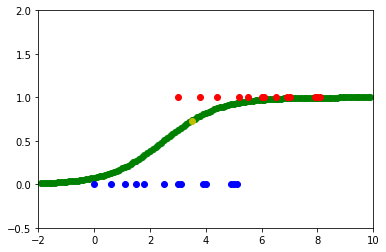

In [42]:
# plot the logistic function
def logistic(classifier, x):
    return 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * x)))


for i in range(1, 120):
    # plt.plot(i / 10.0 - 2, logistic(model, i / 10.0), 'ro', color='green')
    plt.plot(i / 10.0 - 2, logistic(model, i / 10.0), 'go')
    
plt.plot(x1, y1, 'bo')
plt.plot(x2, y2, 'ro')
plt.axis([-2, 10, -0.5, 2])

pred = model.predict([[3.5]])
proba = model.predict_proba([[3.5]])
print("Prediction: ", pred, proba)
plt.plot(3.5, proba[0][0], 'yo')

plt.show()

#### 6.2 Credit Score Example

In [48]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

credit_data = pd.read_csv("Data\credit_data.csv")
print(credit_data.head())  # Show the first five data, LTI: Loan To Income Ratio
print()  
print(credit_data.describe())
print()
print(credit_data.corr())

   clientid        income        age         loan       LTI  default
0         1  66155.925095  59.017015  8106.532131  0.122537        0
1         2  34415.153966  48.117153  6564.745018  0.190752        0
2         3  57317.170063  63.108049  8020.953296  0.139940        0
3         4  42709.534201  45.751972  6103.642260  0.142911        0
4         5  66952.688845  18.584336  8770.099235  0.130989        1

          clientid        income          age          loan          LTI  \
count  2000.000000   2000.000000  2000.000000   2000.000000  2000.000000   
mean   1000.500000  45331.600018    40.927143   4444.369695     0.098403   
std     577.494589  14326.327119    13.262450   3045.410024     0.057620   
min       1.000000  20014.489470    18.055189      1.377630     0.000049   
25%     500.750000  32796.459717    29.062492   1939.708847     0.047903   
50%    1000.500000  45789.117313    41.382673   3974.719419     0.099437   
75%    1500.250000  57791.281668    52.596993   6432.

In [45]:
features = credit_data[["income", "age", "loan"]]  # High CORRelation columns
target = credit_data.default

# 30% of the data-set is for testing and 70% of the data-set is for training
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3)

# Training
model = LogisticRegression()
model.fit = model.fit(feature_train, target_train)

predictions = model.fit.predict(feature_test)

print(confusion_matrix(target_test, predictions))  # diagonal elements are the correct classifications: (0,0), (1,1)
print(accuracy_score(target_test, predictions))
print(model.fit.coef_)  # b1, b2, b3
print(model.fit.intercept_)  # b0

[[499  11]
 [ 21  69]]
0.9466666666666667
[[-2.38972262e-04 -3.59278620e-01  1.73703696e-03]]
[9.93429318]


### 7. Cross Validation

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

credit_data = pd.read_csv("Data\credit_data.csv")

features = credit_data[["income", "age", "loan"]]
target = credit_data.default

# machine learning handle arrays not data-frames
X = np.array(features).reshape(-1, 3)
y = np.array(target)

model = LogisticRegression()
predicted = cross_validate(model, X, y, cv=10)  # to avoid underfitting as well as overfitting -> generalize the model

print(np.mean(predicted['test_score']))

for key, value in predicted.items():
    print(key, value)
#print(predicted)

0.9195000000000002
fit_time [0.00899673 0.00900006 0.01099443 0.01799417 0.01399708 0.01699543
 0.0129981  0.01699233 0.00999689 0.00899673]
score_time [0.00099969 0.00099921 0.00099921 0.         0.         0.
 0.00099874 0.         0.00100088 0.00099969]
test_score [0.9   0.925 0.91  0.97  0.89  0.915 0.91  0.93  0.92  0.925]


### 8. K-Nearest Neighbors
#### K-nearest neighbor I

kNN prediction:  [1]


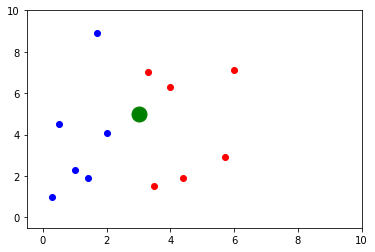

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x_blue = np.array([0.3, 0.5, 1, 1.4, 1.7, 2])
y_blue = np.array([1, 4.5, 2.3, 1.9, 8.9, 4.1])

x_red = np.array([3.3, 3.5, 4, 4.4, 5.7, 6])
y_red = np.array([7, 1.5, 6.3, 1.9, 2.9, 7.1])

X = np.array([[0.3, 1], [0.5, 4.5], [1, 2.3], [1.4, 1.9], [1.7, 8.9], [2, 4.1], [3.3, 7], [3.5, 1.5], [4, 6.3], [4.4, 1.9], [5.7, 2.9], [6, 7.1]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

plt.plot(x_blue, y_blue, 'bo')
plt.plot(x_red, y_red, 'ro')
plt.plot(3, 5, 'go', markersize=15)
plt.axis([-0.5, 10, -0.5, 10])

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X, y)

predict = classifier.predict(np.array([[3, 5]]))
print("kNN prediction: ", predict)

plt.show()


#### K-nearest neighbor II

In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

data = pd.read_csv("Data\credit_data.csv")

print(data.corr())

features = data[["income", "age", "loan"]]
target = data.default

# machine learning library handle arrays not data-frames
X = np.array(features).reshape(-1, 3)
y = np.array(target)
# print(X)

# Normalization
X = preprocessing.MinMaxScaler().fit_transform(X)  # without it, the accuracy drops
# print(X)

feature_train, feature_test, target_train, target_test = train_test_split(X, y, test_size=0.3)

model = KNeighborsClassifier(n_neighbors=32)
fitted_model = model.fit(feature_train, target_train)
predictions = fitted_model.predict(feature_test)

print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))

          clientid    income       age      loan       LTI   default
clientid  1.000000  0.039280 -0.030341  0.018931  0.002538 -0.020145
income    0.039280  1.000000 -0.034984  0.441117 -0.019862  0.002284
age      -0.030341 -0.034984  1.000000  0.006561  0.021588 -0.444765
loan      0.018931  0.441117  0.006561  1.000000  0.847495  0.377160
LTI       0.002538 -0.019862  0.021588  0.847495  1.000000  0.433261
default  -0.020145  0.002284 -0.444765  0.377160  0.433261  1.000000
[[505   4]
 [ 13  78]]
0.9716666666666667


#### K-nearest neighbor III

In [8]:
from sklearn.model_selection import cross_val_score

cross_valid_scores = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cross_valid_scores.append(scores.mean())

print("Optimal k with cross-validation: ", np.argmax(cross_valid_scores))

print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))

Optimal k with cross-validation:  32
[[505   4]
 [ 13  78]]
0.9716666666666667


## 9. Naive Bayes Classifier

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

data = pd.read_csv("Data\credit_data.csv")

features = data[["income", "age", "loan"]]
target = data.default

print(features.corr())  # shows the corelation -> why the model is Naive

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3)

model = GaussianNB()
fittedModel = model.fit(feature_train, target_train)
predictions = fittedModel.predict(feature_test)

print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))

          income       age      loan
income  1.000000 -0.034984  0.441117
age    -0.034984  1.000000  0.006561
loan    0.441117  0.006561  1.000000
[[503  11]
 [ 36  50]]
0.9216666666666666


### Test clustering: Term Frequency - Inverse Document Frequency (TF-IDF)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()

tfidf = vec.fit_transform ([
    'I like machine learning and clustering algoritms',
    'Apples, oranges and any kind of fruits are healthy',
    'Is it feasible with machine learning algorithms?',
    'My family is happy because of the healthy fruits'
])

# print(tfidf)
# print(tfidf.A)  # document term matrix

# Similarity matrix
print((tfidf*tfidf.T).A)


[[1.         0.10300035 0.23274405 0.        ]
 [0.10300035 1.         0.         0.24908972]
 [0.23274405 0.         1.         0.09380898]
 [0.         0.24908972 0.09380898 1.        ]]


### Clustering News

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

training_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

print("\n".join(training_data.data[10].split("\n")[:10]))
print("Target is:", training_data.target_names[training_data.target[10]])

From: anasaz!karl@anasazi.com (Karl Dussik)
Subject: Re: Is "Christian" a dirty word?
Organization: Anasazi Inc Phx Az USA
Lines: 73

In article <Mar.25.03.53.08.1993.24855@athos.rutgers.edu> @usceast.cs.scarolina.edu:moss@cs.scarolina.edu (James Moss) writes:
>I was brought up christian, but I am not christian any longer.
>I also have a bad taste in my mouth over christianity.  I (in
>my own faith) accept and live my life by many if not most of the
>teachings of christ, but I cannot let myself be called a christian,
Target is: soc.religion.christian


In [12]:
# we just count the word occurrences
count_vector = CountVectorizer()
x_train_counts = count_vector.fit_transform(training_data.data)

cnt = 0
for text, occurances in count_vector.vocabulary_.items():
    print(text, occurances)
    cnt += 1
    if cnt == 10:
        break



from 14887
sd345 29022
city 8696
ac 4017
uk 33256
michael 21661
collier 9031
subject 31077
converting 9805
images 17366


In [18]:
# we transform the word occurrences into tf-idf
# TfidfVectorizer = CountVectorizer + TfidfTransformer
tfid_transformer = TfidfTransformer()
x_train_tfidf = tfid_transformer.fit_transform(x_train_counts)
# print(x_train_tfidf)

model = MultinomialNB().fit(x_train_tfidf, training_data.target)

new = ['My favourite topic has something to do with quantum physics and quantum mechanics',
       'This has nothing to do with church or religion',
       'Software engineering is getting hotter and hotter nowadays']

x_new_counts = count_vector.transform(new)
x_new_tfidf = tfid_transformer.transform(x_new_counts)

predicted = model.predict(x_new_tfidf)
print(predicted)

for doc, category in zip(new, predicted):
    print('%r --------> %s' % (doc, training_data.target_names[category]))

[0 3 1]
'My favourite topic has something to do with quantum physics and quantum mechanics' --------> alt.atheism
'This has nothing to do with church or religion' --------> soc.religion.christian
'Software engineering is getting hotter and hotter nowadays' --------> comp.graphics


## 10. Support Vector Machines (SVMs)
### A simple example

[1]


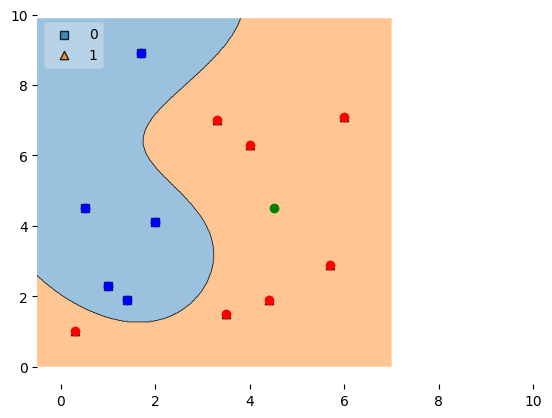

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

x_blue = np.array([0.5, 1, 1.4, 1.7, 2])
y_blue = np.array([4.5, 2.3, 1.9, 8.9, 4.1])

x_red = np.array([0.3, 3.3, 3.5, 4, 4.4, 5.7, 6])
y_red = np.array([1, 7, 1.5, 6.3, 1.9, 2.9, 7.1])

X = np.array(
    [[0.3, 1], [0.5, 4.5], [1, 2.3], [1.4, 1.9], [1.7, 8.9], [2, 4.1], [3.3, 7], [3.5, 1.5], [4, 6.3], [4.4, 1.9],
     [5.7, 2.9], [6, 7.1]])
y = np.array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0: blue class, 1: red class

plt.plot(x_blue, y_blue, 'bo')
plt.plot(x_red, y_red, 'ro')
plt.plot(4.5, 4.5, 'go')

"""
#	Important parameters for SVC: gamma and C
#		gamma -> defines how far the influence of a single training example reaches
#					Low value: influence reaches far      High value: influence reaches close
#
#		C -> trades off hyperplane surface simplicity + training examples mis-classification
#					Low value: simple/smooth hyperplane surface 
#					High value: all training examples classified correctly but complex surface 
"""

# classifier = svm.SVC(C=1)  # one misclassification
classifier = svm.SVC(C=10)
classifier.fit(X, y)

print(classifier.predict([[4.5, 4.5]]))

plot_decision_regions(X, y, clf=classifier, legend=2)

plt.axis([-0.5, 10, -0.5, 10])
plt.show()


### SVC Iris example

In [13]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets

iris_data = datasets.load_iris()

features = iris_data.data
print(features[:10])  # four features
target = iris_data.target  # 0, 1, or 2

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3)

model = svm.SVC()
fitted_model = model.fit(feature_train, target_train)
predictions = fitted_model.predict(feature_test)

print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))  # cf. deep learning can achieve 100%

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[16  0  0]
 [ 0 14  0]
 [ 0  1 14]]
0.9777777777777777


### SVC - Parameter Tuning

In [18]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

iris_data = datasets.load_iris()

features = iris_data.data
target = iris_data.target

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3)

model = svm.SVC()

param_grid = {'C': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 100, 200],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(model, param_grid, refit=True)
grid.fit(feature_train, target_train)

print(grid.best_estimator_)

grid_predictions = grid.predict(feature_test)
print(confusion_matrix(target_test, grid_predictions))
print(accuracy_score(target_test, grid_predictions))


SVC(C=5, gamma=0.1)
[[13  0  0]
 [ 0 12  1]
 [ 0  0 19]]
0.9777777777777777


### SVC - Digit Recognition

(1797, 8, 8)
(1797, 64)


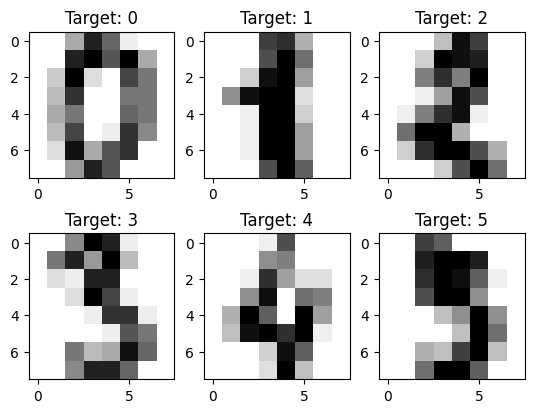

In [23]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
print(digits.images.shape)

# Display image and labels
images_and_labels = list(zip(digits.images, digits.target))

for idx, (image, label) in enumerate(images_and_labels[:6]):
    plt.subplot(2, 3, idx + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Target: {label}')


# to apply a classifier on this data, we need to flatten the image: instead of a 8x8 matrix we
# have to use a one-dimensional array with 64 items
data = digits.images.reshape((len(digits.images), -1))  # 8 x 8 -> 64
print(data.shape)

Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  2  0  1  4  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  0 40  0]
 [ 0  0  0  1  0  1  0  0  0 43]]
0.9666666666666667
Prediction for test image:  [8]


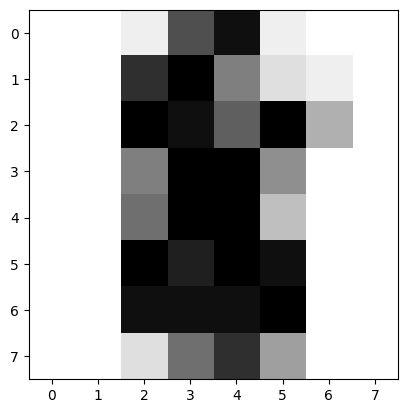

In [24]:
classifier = svm.SVC(gamma=0.001)

# 75% of the original data-set if for training
train_test_split = int(len(digits.images) * 0.75)
classifier.fit(data[:train_test_split], digits.target[:train_test_split])

# now predict the value of the digit on the 25%
expected = digits.target[train_test_split:]
predicted = classifier.predict(data[train_test_split:])

print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print(accuracy_score(expected, predicted))

# let's test on the last few images
plt.imshow(digits.images[-3], cmap=plt.cm.gray_r, interpolation='nearest')
print("Prediction for test image: ", classifier.predict(data[-3].reshape(1, -1)))

plt.show()

## 11. Decision Trees

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import datasets

iris_data = datasets.load_iris()

features = iris_data.data
targets = iris_data.target

feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=.2)

model = DecisionTreeClassifier()

predicted = cross_validate(model, features, targets, cv=10)
print(np.mean(predicted['test_score']))

0.96


In [20]:
# Parameter tuning

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

iris_data = datasets.load_iris()

features = iris_data.data
targets = iris_data.target

# with grid search you can find an optimal parameter "parameter tuning"
param_grid = {'max_depth': np.arange(1, 10)}

feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=.2)

# in every iteration we split the data randomly in cross validation + DecisionTreeClassifier
# initializes the tree randomly: that's why you get different results !!!
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(feature_train, target_train)

print("Best parameter with Grid Search: ", tree.best_params_)

grid_predictions = tree.predict(feature_test)
print(confusion_matrix(target_test, grid_predictions))
print(accuracy_score(target_test, grid_predictions))

Best parameter with Grid Search:  {'max_depth': 3}
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


In [22]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_validate

cancer_data = datasets.load_breast_cancer()

features = cancer_data.data
labels = cancer_data.target

feature_train, feature_test, target_train, target_test = train_test_split(features, labels, test_size=0.3)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

predicted = cross_validate(model, features, labels, cv=10)
print(np.mean(predicted['test_score']))


0.9332393483709274


## 12. Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets

iris_data = datasets.load_iris()

features = iris_data.data
targets = iris_data.target

feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=.2)

model = RandomForestClassifier(n_estimators=1000, max_features='sqrt')
fitted_model = model.fit(feature_train, target_train)
predictions = fitted_model.predict(feature_test)

print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
0.9


In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# logistic regression accuracy: 93%
# we do better with knn: 97.5% !!!!!!!!
# 84% simple kNN without normalizing the dataset
# we can achieve ~ 99% with random forests

credit_data = pd.read_csv("Data/credit_data.csv")

features = credit_data[["income", "age", "loan"]]
targets = credit_data.default

# machine learning handle arrays not data-frames
X = np.array(features).reshape(-1, 3)
y = np.array(targets)

model = RandomForestClassifier()
predicted = cross_validate(model, X, y, cv=10)

print(np.mean(predicted['test_score']))

0.9884999999999998


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets

digit_data = datasets.load_digits()

image_features = digit_data.images.reshape((len(digit_data.images), -1))
image_targets = digit_data.target

random_forest_model = RandomForestClassifier(n_jobs=-1, max_features='sqrt')

feature_train, feature_test, target_train, target_test = train_test_split(image_features, image_targets, test_size=.2)

param_grid = {
    #"n_estimators": [10, 100, 500, 1000],
    "n_estimators": [10],
    "max_depth": [1, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 10, 15, 30, 50]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=10)
grid_search.fit(feature_train, target_train)
print(grid_search.best_params_)

optimal_estimators = grid_search.best_params_.get("n_estimators")
optimal_depth = grid_search.best_params_.get("max_depth")
optimal_leaf = grid_search.best_params_.get("min_samples_leaf")

print("Optimal n_estimators: %s" % optimal_estimators)
print("Optimal optimal_depth: %s" % optimal_depth)
print("Optimal optimal_leaf: %s" % optimal_leaf)

grid_predictions = grid_search.predict(feature_test)
print(confusion_matrix(target_test, grid_predictions))
print(accuracy_score(target_test, grid_predictions))


{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 10}
Optimal n_estimators: 10
Optimal optimal_depth: 15
Optimal optimal_leaf: 1
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 1  0 33  0  0  0  0  0  0  1]
 [ 0  0  1 35  0  0  0  0  1  1]
 [ 0  0  0  0 33  0  0  1  0  1]
 [ 0  0  0  0  0 40  1  0  0  3]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  2  1  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  1  0  0  0 33]]
0.9555555555555556


## 13. Boosting

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets

iris_data = datasets.load_iris()

features = iris_data.data
targets = iris_data.target

feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=.2)

model = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=123)
model.fitted = model.fit(feature_train, target_train)
model.predictions = model.fitted.predict(feature_test)

print(confusion_matrix(target_test, model.predictions))
print(accuracy_score(target_test, model.predictions))

[[ 9  0  0]
 [ 0  7  0]
 [ 0  2 12]]
0.9333333333333333


In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


def is_tasty(quality):
    if quality >= 7:
        return 1
    else:
        return 0


data = pd.read_csv("Data/wine.csv", sep=";")

features = data[
    ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide",
     "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
data['tasty'] = data["quality"].apply(is_tasty)
targets = data['tasty']

# machine learning handle arrays not data-frames
X = np.array(features).reshape(-1, 11)
y = np.array(targets)

# X = preprocessing.MinMaxScaler().fit_transform(X)  # proprocessing can reduce the accuracy in Boosting

feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=.2)

param_dist = {
    'n_estimators': [10, 50, 200],
    'learning_rate': [0.01, 0.05, 0.3, 1],
}

estimator = AdaBoostClassifier()

grid_search = GridSearchCV(estimator=estimator, param_grid=param_dist, cv=10)
grid_search.fit(feature_train, target_train)

predictions = grid_search.predict(feature_test)

print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))


[[741  41]
 [118  80]]
0.8377551020408164


## 14. Principal Component Analysis (PCA)

Explained variance: [0.14890594 0.13618771 0.11794594 0.08409979 0.05782414 0.0491691
 0.0431598  0.03661331 0.03353165 0.03078776]


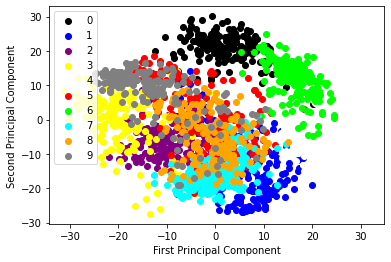

In [6]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

X_digits = digits.data
y_digits = digits.target

estimator = PCA(n_components=10)
X_pca = estimator.fit_transform(X_digits)

colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
    px = X_pca[:, 0][y_digits == i]
    py = X_pca[:, 1][y_digits == i]
    plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# explained variance shows how much information can be attributed to the principle components
print("Explained variance: %s" % estimator.explained_variance_ratio_)

plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

mnist_data = fetch_openml('mnist_784')

features = mnist_data.data
targets = mnist_data.target

train_img, test_img, train_lbl, test_lbl = train_test_split(features, targets, test_size=0.15, random_state=0)

scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

print(train_img.shape)

# we keep 95% variance - so 95% of the original information
pca = PCA(.95)
pca.fit(train_img)

train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

print(train_img.shape)

(59500, 784)
(59500, 327)


## 15. Clustering

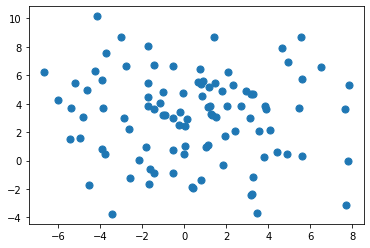

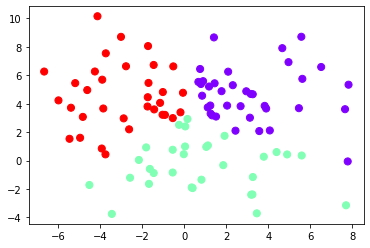

In [13]:
# K-means clustering example

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=3)

plt.scatter(x[:, 0], x[:, 1], s=50)
plt.show()

model = KMeans(3)
model.fit(x)
y_kmeans = model.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='rainbow')
plt.show()

In [14]:
import collections
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# stop words are common words which does not add much meaning to a sentence
# such as ['I', 'am', 'he', 'she', 'is', 'on', 'in']
nltk.download('stopwords')


def tokenizer(text):
    # transform the text into an array of words
    tokens = word_tokenize(text)
    # yields the stem (fishing-fish, fisher-fish)
    stemmer = PorterStemmer()
    # we filter out stopwords
    tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
    return tokens


def cluster_sentences(texts, n=2):
    # create TF-IDF again: stopwords-> we filter out common words (I,my, the, and...)
    vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('english'), lowercase=True)
    # builds a TF-IDF matrix for the sentences
    matrix = vectorizer.fit_transform(texts)
    # fitting the k-means clustering model
    model = KMeans(n_clusters=n)
    model.fit(matrix)
    topics = collections.defaultdict(list)

    for index, label in enumerate(model.labels_):
        topics[label].append(index)

    return dict(topics)


if __name__ == '__main__':

    sentences = ["FOREX is the stock market for trading currencies",
                 "Quantuum physics is quite important in science nowadays.",
                 "Investing in stocks and trading with them are not that easy",
                 "Software engineering is hotter and hotter topic in the silicon valley",
                 "Warren Buffet is famous for making good investments. He knows stock markets"]

    n_clusters = 2
    clusters = cluster_sentences(sentences, n_clusters)

    for cluster in range(n_clusters):
        print("CLUSTER ", cluster, ":")
        for i, sentence in enumerate(clusters[cluster]):
            print("\tSENTENCE ", i+1, ": ", sentences[sentence])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\roy/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\roy\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


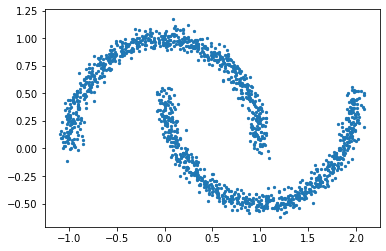

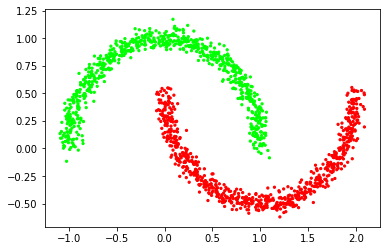

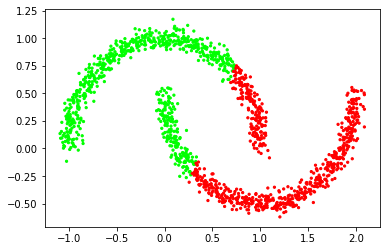

In [25]:
# DBSCAN example

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np

X, y = datasets.make_moons(n_samples=1500, noise=.05)

x1 = X[:, 0]
x2 = X[:, 1]

plt.scatter(x1, x2, s=5)
plt.show()

dbscan = DBSCAN(eps=0.2)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)

colors = np.array(['#ff0000', '#00ff00'])

plt.scatter(x1, x2, s=5, color=colors[y_pred])
plt.show()

# results with K-Means Clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.labels_.astype(int)

plt.scatter(x1, x2, s=5, color=colors[y_pred])
plt.show()


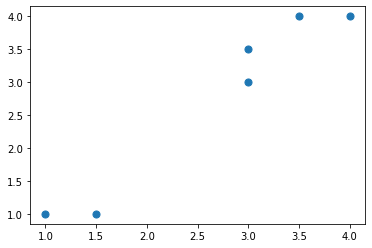

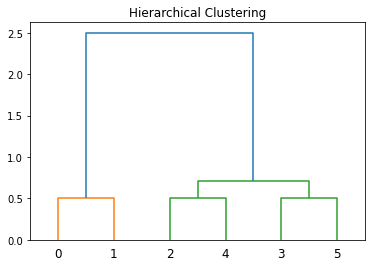

In [26]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

x = np.array([[1, 1], [1.5, 1], [3, 3], [4, 4], [3, 3.5], [3.5, 4]])

plt.scatter(x[:, 0], x[:, 1], s=50)
plt.show()

linkage_matrix = linkage(x, "single")

dendrogram = dendrogram(linkage_matrix, truncate_mode='none')

plt.title("Hierarchical Clustering")
plt.show()

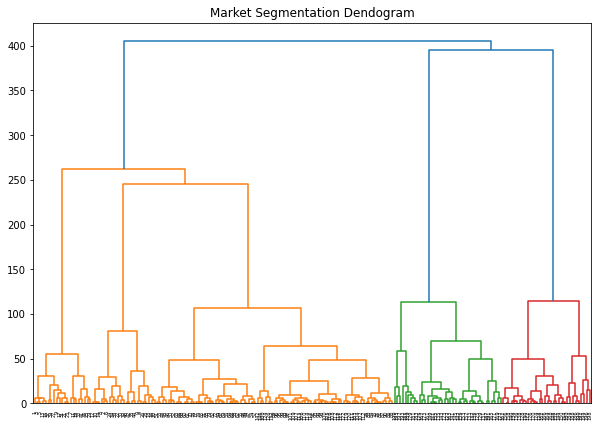

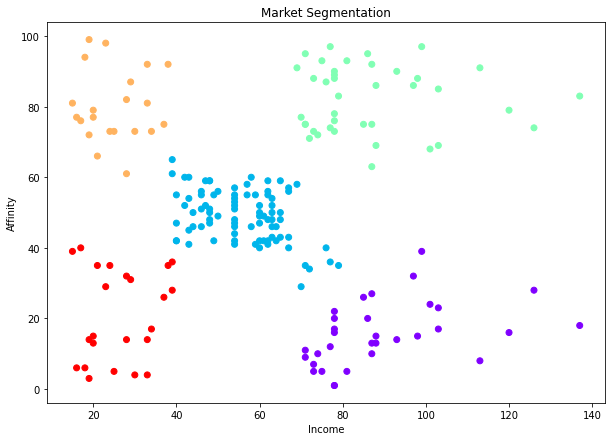

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as cluster_algorithm
from sklearn.cluster import AgglomerativeClustering

shopping_data = pd.read_csv('./Data/shopping_data.csv')
data = shopping_data.iloc[:, 3:5].values

plt.figure(figsize=(10, 7))
plt.title('Market Segmentation Dendogram')
dendogram = cluster_algorithm.dendrogram(cluster_algorithm.linkage(data, method='ward'))

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  # 5 from dendogram
cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')
plt.title('Market Segmentation')
plt.xlabel('Income')
plt.ylabel('Affinity')
plt.show()

## 16. Machine Learning Project I: Face Recognition

In [47]:
from enum import unique
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

olivetti_data = fetch_olivetti_faces()  # Data is already normalized

# there are 400 images - 10x40 (40 people - 1 person has 10 images) - 1 image = 64x64 pixels
features = olivetti_data.data
print(features.shape)
# we represent target variables (people) with integers (face ids)
targets = olivetti_data.target

(400, 4096)


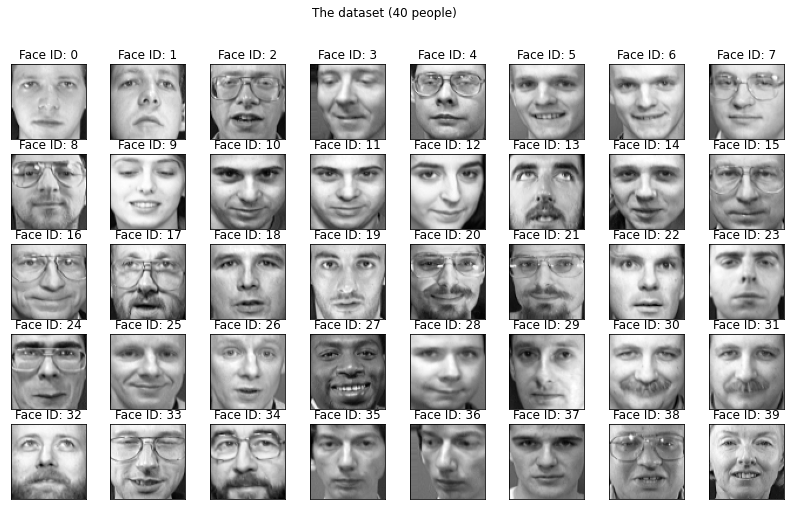

In [48]:
# Visualize the dataset
fig, sub_plots = plt.subplots(nrows=5, ncols=8, figsize=(14, 8))
sub_plots = sub_plots.flatten()

for unique_user_id in np.unique(targets):
    image_index = unique_user_id * 8
    sub_plots[unique_user_id].imshow(features[image_index].reshape(64, 64), cmap='gray')
    sub_plots[unique_user_id].set_xticks([])
    sub_plots[unique_user_id].set_yticks([])
    sub_plots[unique_user_id].set_title(f'Face ID: {unique_user_id}')
plt.suptitle('The dataset (40 people)')
plt.show()

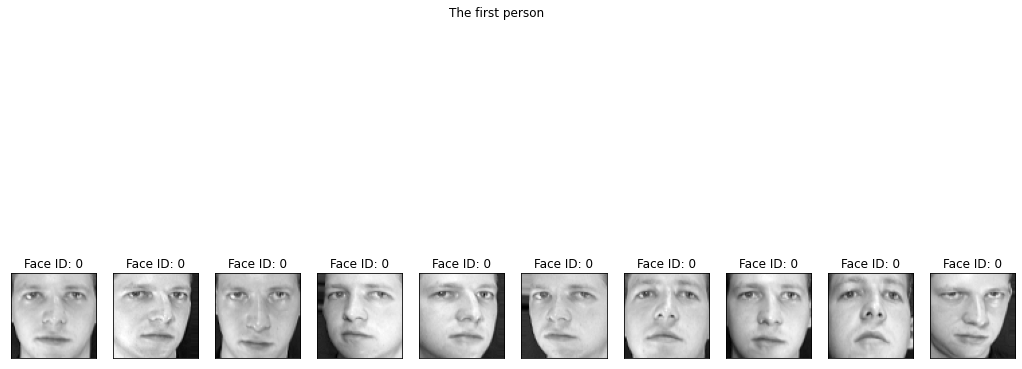

In [49]:
# 10 images for the first person (face id = 0)
fig, sub_plots = plt.subplots(nrows=1, ncols=10, figsize=(18,9))

for j in range(10):
    sub_plots[j].imshow(features[j].reshape(64, 64), cmap='gray')
    sub_plots[j].set_xticks([])
    sub_plots[j].set_yticks([])
    sub_plots[j].set_title('Face ID: 0')
plt.suptitle('The first person')
plt.show()

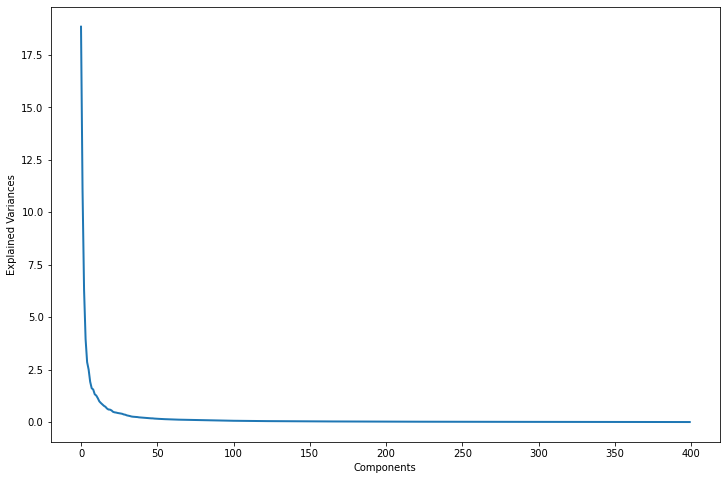

In [50]:
# split the original data-set (training and test set)
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, stratify=targets, random_state=0)

# Let's find the optimal number of eigenvectors (principal components)
pca = PCA()
pca.fit(features)
plt.figure(1, figsize=(12, 8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()  # 100 can be a good enough

In [52]:
# let's try to find the optimal number of eigenvectors (principle components)
pca = PCA(n_components=100, whiten=True)  # 4096 -> 100
pca.fit(X_train)
X_pca = pca.fit_transform(features)
print(X_pca.shape)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

(400, 100)


100
[-0.00419115 -0.00710953 -0.0093361  ...  0.00018516  0.00337966
  0.00318826] 4096


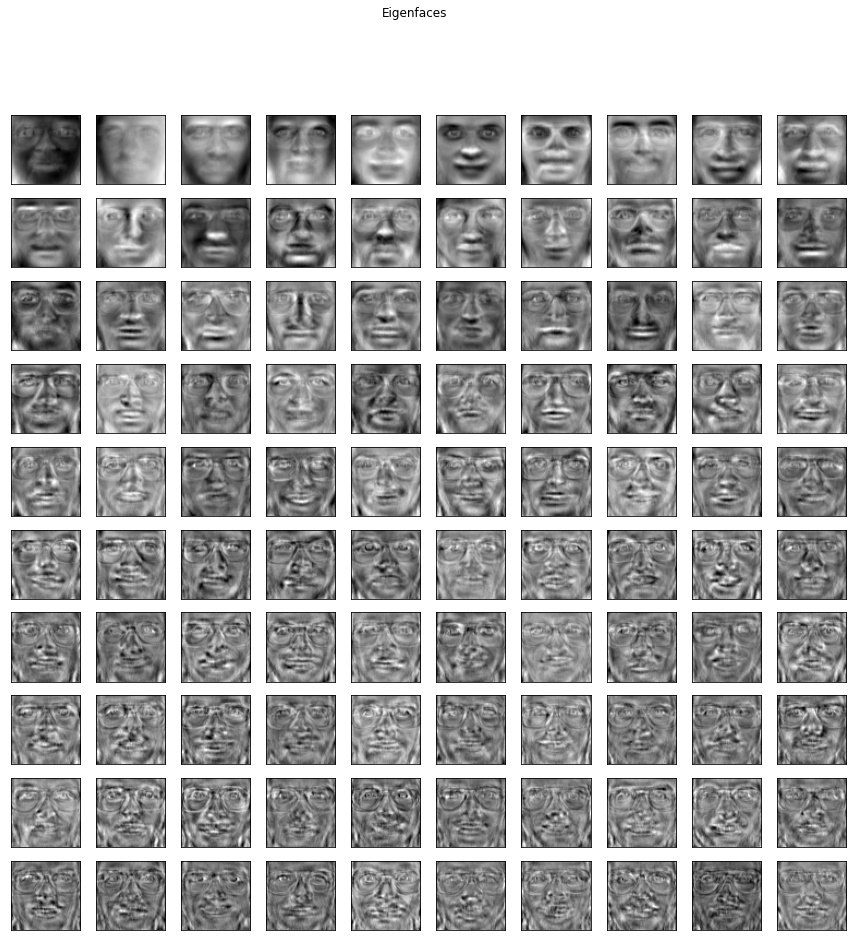

In [53]:
# after we find the optimal 100 PCA numbers we can check the 'eigenfaces'
# 1 principle component (eigenvector) has 4096 features
number_of_eigenfaces = len(pca.components_)
print(number_of_eigenfaces)
print(pca.components_[0], len(pca.components_[0]))
eigen_faces = pca.components_.reshape((number_of_eigenfaces, 64, 64))

fig, sub_plots = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))
sub_plots = sub_plots.flatten()

for i in range(number_of_eigenfaces):
    sub_plots[i].imshow(eigen_faces[i], cmap='gray')
    sub_plots[i].set_xticks([])
    sub_plots[i].set_yticks([])
plt.suptitle('Eigenfaces')
plt.show()

In [54]:
# let's use the machine learning models

models = [("Logistic Regression", LogisticRegression()), ("Support Vector Machine", SVC()), ("Naive Bayes Classifier", GaussianNB())]

for name, model in models:

    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_scores = cross_val_score(model, X_pca, targets, cv=kfold)
    print(f"{model} Mean of the cross-validation scores: {cv_scores.mean()}")

LogisticRegression() Mean of the cross-validation scores: 0.9275
SVC() Mean of the cross-validation scores: 0.8450000000000001
GaussianNB() Mean of the cross-validation scores: 0.7575000000000001
